In [1]:
from tqdm import tqdm
import os
import shutil
import numpy as np
import pandas as pd
import cv2
import pylidc as pl
import tensorflow.keras as keras
import tensorflow as tf

import matplotlib.pyplot as plt
import feather
import png
from utils import *

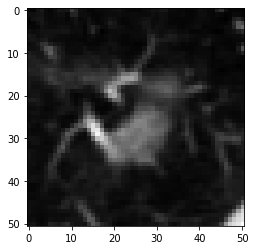

In [2]:
DATADIR = "H:/Project Data/manifest-1600709154662/data/nodules2D"

CATEGORIES = ["benign","malignant"]

for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap = "gray")
        plt.show()
        break
    break

In [3]:
print(img_array)

[[ 18  17  25 ...  18  18  17]
 [ 23  23  25 ...  21  20  18]
 [ 19  25  27 ...  32  37  28]
 ...
 [ 22  20  19 ... 104 134 146]
 [ 21  22  19 ... 131 142 148]
 [ 24  26  21 ... 143 149 164]]


In [4]:
print(img_array.shape)

(51, 51)


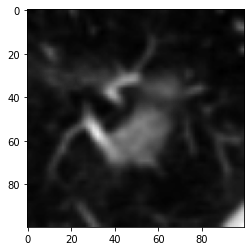

In [5]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            
create_training_data()
print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 423/423 [00:05<00:00, 71.27it/s]

1606


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
1
1
1
0
0
1
1


In [9]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    
print(X[0].reshape(-1,IMG_SIZE,IMG_SIZE,1))

X = tf.keras.utils.normalize(X,axis=1)

X = np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array(y)

[[[[ 10]
   [  9]
   [  6]
   ...
   [147]
   [144]
   [143]]

  [[ 10]
   [  9]
   [  7]
   ...
   [148]
   [143]
   [141]]

  [[  9]
   [  9]
   [  8]
   ...
   [149]
   [141]
   [136]]

  ...

  [[ 20]
   [ 18]
   [ 15]
   ...
   [166]
   [166]
   [166]]

  [[ 19]
   [ 18]
   [ 17]
   ...
   [166]
   [165]
   [164]]

  [[ 19]
   [ 19]
   [ 19]
   ...
   [165]
   [164]
   [163]]]]


In [23]:
pip install --upgrade tensorflow

Note: you may need to restart the kernel to use updated packages.Collecting tensorflow


ERROR: Could not install packages due to an EnvironmentError: [Errno 28] No space left on device




  Using cached tensorflow-2.6.0-cp37-cp37m-win_amd64.whl (423.2 MB)


ModuleNotFoundError: No module named 'tensorflow.keras.layers.merge'

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
from tensorflow.keras import layers

NAME = "TRIAL 10"

X = X/255.0

model = Sequential()

model.add(Conv2D(64, (7, 7), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))


tboard_log_dir = os.path.join("logs",NAME)
tensorboard = TensorBoard(log_dir = tboard_log_dir)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'],
              )

model.fit(X, y,
          batch_size=32,
          epochs=10,
          validation_split=0.2,
          callbacks=[tensorboard])
            

Train on 1284 samples, validate on 322 samples
Epoch 1/10
1284/1284 [==============================] - 21s 17ms/sample - loss: 0.6216 - accuracy: 0.7251 - val_loss: 0.5608 - val_accuracy: 0.7516
Epoch 2/10
1284/1284 [==============================] - 13s 10ms/sample - loss: 0.5873 - accuracy: 0.7329 - val_loss: 0.6163 - val_accuracy: 0.7516
Epoch 3/10
1284/1284 [==============================] - 13s 10ms/sample - loss: 0.5944 - accuracy: 0.7329 - val_loss: 0.5676 - val_accuracy: 0.7516
Epoch 4/10
1284/1284 [==============================] - 13s 10ms/sample - loss: 0.5852 - accuracy: 0.7329 - val_loss: 0.5616 - val_accuracy: 0.7516
Epoch 5/10
1284/1284 [==============================] - 13s 10ms/sample - loss: 0.5858 - accuracy: 0.7329 - val_loss: 0.5607 - val_accuracy: 0.7516
Epoch 6/10
1284/1284 [==============================] - 13s 10ms/sample - loss: 0.5850 - accuracy: 0.7329 - val_loss: 0.5670 - val_accuracy: 0.7516
Epoch 7/10
1284/1284 [==============================] - 13s 10ms/

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 64)        3200      
_________________________________________________________________
activation (Activation)      (None, 94, 94, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 128)       32896     
_________________________________________________________________
activation_1 (Activation)    (None, 46, 46, 128)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 67712)             0